In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [2]:
print('class labels',np.unique(y))

class labels [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [4]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [5]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

In [6]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [9]:
y_pred=ppn.predict(X_test_std)

In [10]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [11]:
from sklearn.metrics import accuracy_score
print('accuracy score : %.5f ' % accuracy_score(y_test,y_pred))

accuracy score : 0.97778 


In [12]:
print('accuracy: %.3f' % ppn.score(X_test_std,y_test))

accuracy: 0.978


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')     


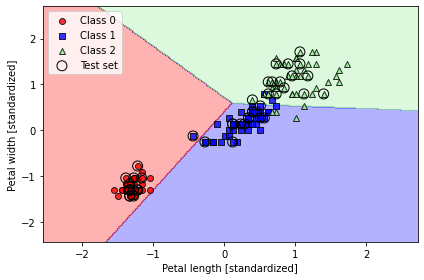

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

# view sigmoid function

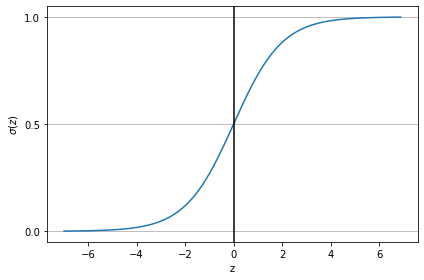

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1/(1+np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()

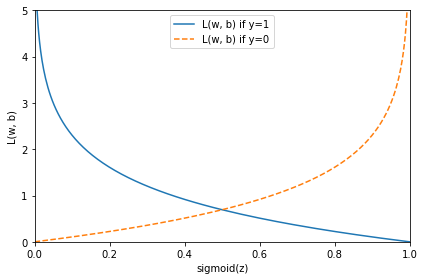

In [16]:
def loss_1(z):
    return - np.log(sigmoid(z))
def loss_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.0)
plt.xlim(0, 1)
plt.xlabel('sigmoid(z)')
plt.ylabel('L(w, b)')
plt.legend()
plt.tight_layout()

# Converting an Adaline implementation into an algorithm for logistic regression code soon

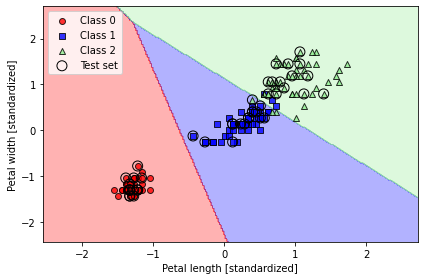

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0,solver='liblinear',multi_class='ovr')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

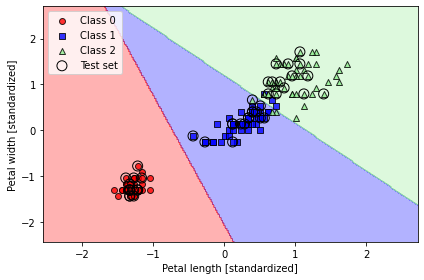

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

In [19]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [20]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

# the relationship between c param and regularization

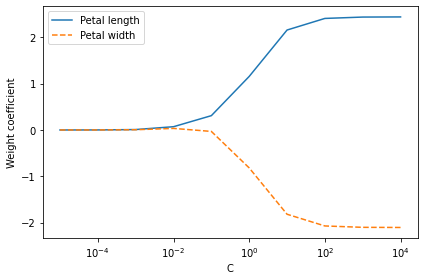

In [21]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.tight_layout()
plt.show()

# svm

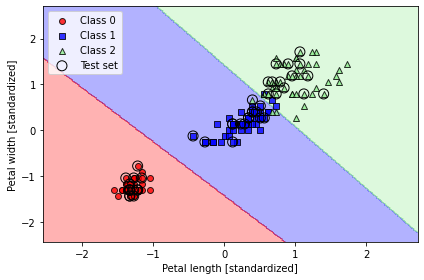

In [22]:
from sklearn.svm import SVC
svm=SVC(C=100.0,kernel='linear',random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

# Kernel methods for linearly inseparable data

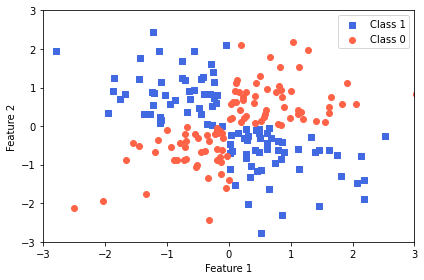

In [23]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0] > 0 ,X_xor[:,1] > 0)
y_xor=np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='royalblue', marker='s',label='Class 1')
plt.scatter(X_xor[y_xor == 0,0],X_xor[y_xor == 0,1],c ='tomato',marker='o',label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
#data in 2d > data in 3d > data in 3d with hyperplne > data in 2d with seperate line nonlinear 

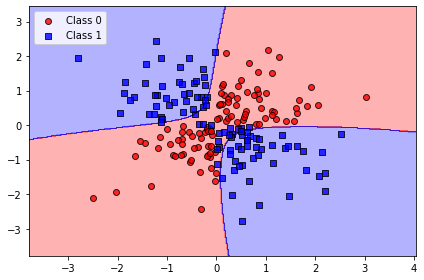

In [25]:
svm=SVC(kernel='rbf',random_state=1 ,C=10.0,gamma=0.10)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()

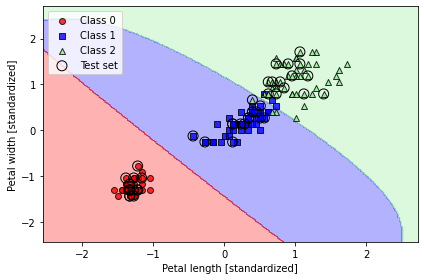

In [26]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

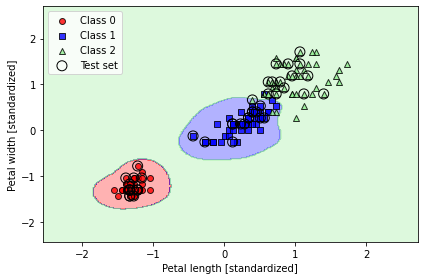

In [32]:
#increase c paramter 
svm = SVC(kernel='rbf', random_state=1, gamma=10., C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

# decision tree 

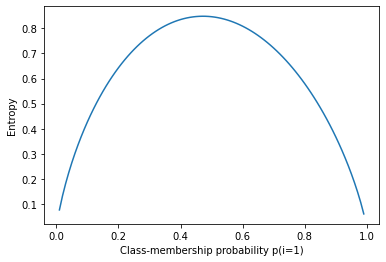

In [35]:
def entropy(p):
    return - p * np.log2(p) - (1-p)* np.log((1-p))
x=np.arange(0.0,1.0,0.01)
ent=[entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x,ent)

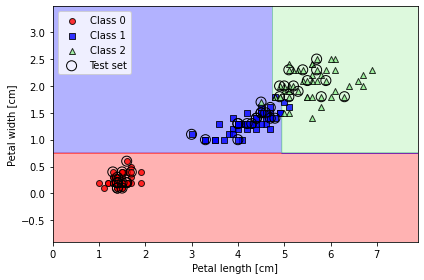

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
max_depth=4,
random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

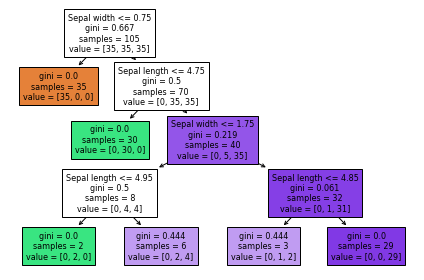

In [47]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width','Petal length', 'Petal width']
tree.plot_tree(tree_model,feature_names=feature_names,filled=True,fontsize=8)
plt.tight_layout()


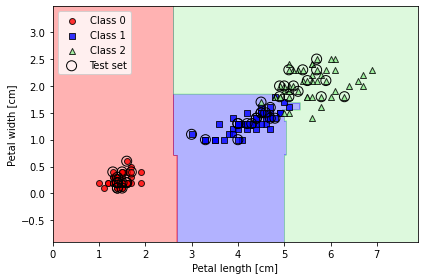

In [48]:
#random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25,
random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()